In [73]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

In [74]:
import matplotlib.pyplot as plt

Prepare Data

In [75]:
X_numpy,Y_numpy=datasets.make_regression(n_samples=100,n_features=1,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))

In [76]:
Y=torch.from_numpy(Y_numpy.astype(np.float32))

In [77]:
y=Y.view(Y.shape[0],1)

In [78]:
n_samples,n_features=X.shape

In [79]:
input_size=n_features
output_size=1

In [80]:
model=nn.Linear(input_size,output_size)
1

1

In [81]:
#Loss and optimizer
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [82]:
num_epochs=50
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



epoch: 10, loss = 3786.1897
epoch: 20, loss = 2755.1191
epoch: 30, loss = 2006.0884
epoch: 40, loss = 1461.5334
epoch: 50, loss = 1065.3582


In [83]:
predicted=model(X).detach().numpy()

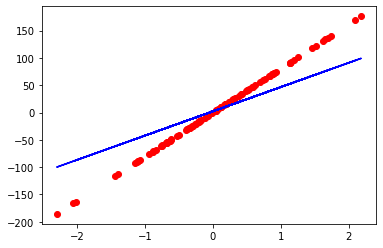

In [84]:
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()